In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle   
import zipfile


SciKit library is used for this module. Within sckit learn we have a classifier model using the setting module (Max depth of tree, counts of the feature), training module (train test validation) and classification evaluation (confusion matrix, classification accuracy).  



In [3]:
#Data Ingestion
url = r"./data1.csv"

dataset = pd.read_csv(url)

#Data preperation
df = dataset.infer_objects()
#this for loop loops through each coloumn. It first checks if the data type is int64 and if it is it skips over. If it isn't it goes through each coloumn and remaps it with the same entry stripped of the white space. 
for ij in range(0,14):
    if df.dtypes[ij]!= "int64":
        dataset.iloc[:,ij] = df.iloc[:,ij].map(lambda x:x.strip()) #the lambda function takes a variable x and returns x.stripped()

print(df.dtypes[0:14])

f1      int64
f2     object
f3      int64
f4     object
f5      int64
f6     object
f7     object
f8     object
f9     object
f10    object
f11     int64
f12     int64
f13     int64
f14    object
dtype: object


In [4]:
array = dataset
array.head

inputs = array.drop("class", axis = "columns")
inputs

target = array["class"]
#target
inputs.head()
#prints the number of unique entries in each column
print(inputs["f4"].nunique()) 
inputs

16


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [5]:
labelEncoder = preprocessing.LabelEncoder()

X = inputs.values

Y = target.values

# education has like 15 different unique string values and it will assign 0-14 for those features. Another option is to assign a 
# binary value to the feature and split the features into multiple features to make that work
#LabelEncoder goes through the data and trys to convert it to a numerical value.
for ij in range(0,14):
    X[:,ij] = labelEncoder.fit_transform(X[:,ij])

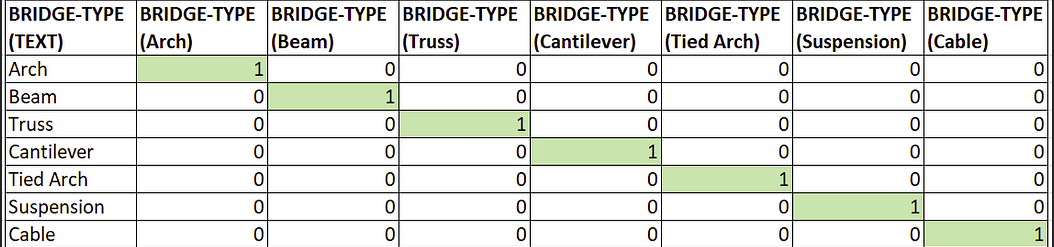

example of what LabelEncoder is doing

# Training


Split the data set into train and test data set. You are training the model on the train data set. During this the model is learning. 

Then we can zip the model and deploy it to azure or whatever. Then we can access using the REST API to feed new data and get the results. 

In [6]:
validation_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=validation_size)
DT = DecisionTreeClassifier(criterion="entropy", max_features=14, max_depth=10)

DT = DT.fit(X_train, Y_train)
y_prediction = DT.predict(X_test)

Pickle is the serialization module. Serialization is converting an object into a format that can be stored and transmitted

In [7]:
print(accuracy_score(Y_test, y_prediction))
print(confusion_matrix(Y_test, y_prediction))

0.8453861507753724
[[1014  561]
 [ 446 4492]]


In [8]:
print("Export the model to model.pkl")#pickle
f = open("model.pkl", "wb")
pickle.dump(DT,f)
f.close


Export the model to model.pkl


<function BufferedWriter.close>